## PLS for prediction of pectin yield from Carbohydrate microarray data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

extraction1 = pd.read_pickle('extraction1.pkl')
extraction2 = pd.read_pickle('extraction2.pkl')
extraction3 = pd.read_pickle('extraction3.pkl')

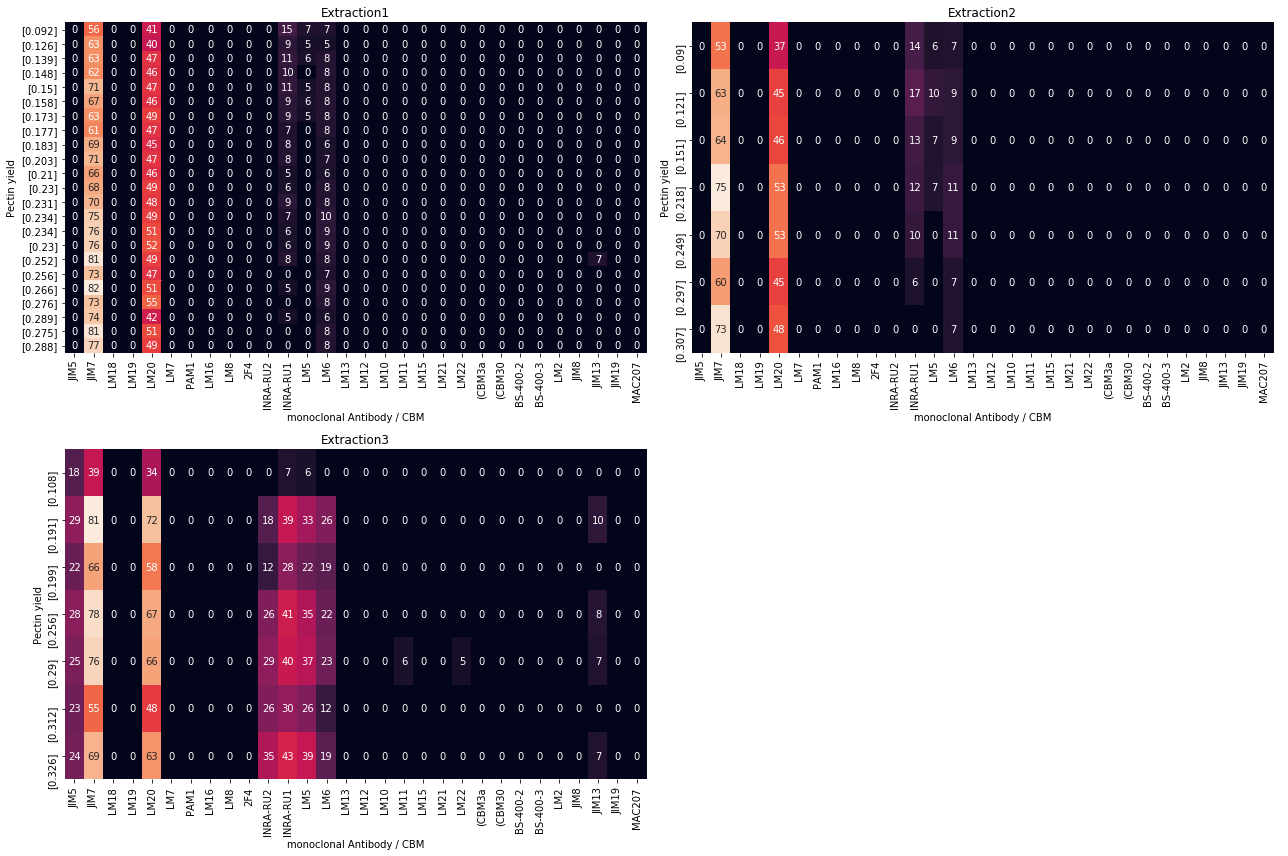

In [2]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(18,12))
sns.heatmap(extraction1, ax=ax[0][0], annot=True, cbar=False)
sns.heatmap(extraction2, ax=ax[0][1], annot=True, cbar=False)
sns.heatmap(extraction3, ax=ax[1][0], annot=True, cbar=False)
ax[1][1].axis('off')

ax[0][0].set_title('Extraction1')
ax[0][1].set_title('Extraction2')
ax[1][0].set_title('Extraction3')
ax[0][0].set_xlabel('monoclonal Antibody / CBM')
ax[0][1].set_xlabel('monoclonal Antibody / CBM')
ax[1][0].set_xlabel('monoclonal Antibody / CBM')
ax[0][0].set_ylabel('Pectin yield')
ax[0][1].set_ylabel('Pectin yield')
ax[1][0].set_ylabel('Pectin yield')
plt.tight_layout()

In [3]:
extractions_all = pd.concat((extraction1, extraction2, extraction3),axis=0)
yield_all = extractions_all.index

Text(60,0.5,'Pectin yield')

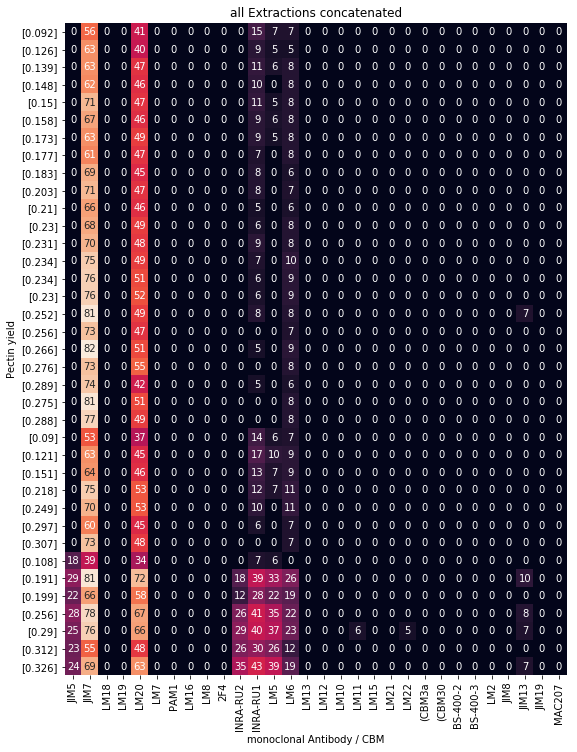

In [4]:
plt.figure(figsize=(9,12))
sns.heatmap(extractions_all, annot=True, cbar=False)
plt.title('all Extractions concatenated')
plt.xlabel('monoclonal Antibody / CBM')
plt.ylabel('Pectin yield')

In [5]:
from sklearn.cross_decomposition import PLSRegression
from mbpls.mbpls import MBPLS
from sklearn.preprocessing import StandardScaler

pls = PLSRegression(n_components=5,scale=True)
mbpls = MBPLS(n_components=5,standardize=True)

pls.fit_transform(extractions_all, yield_all)
mbpls.fit_transform(extractions_all, yield_all)
prediction1 = pls.predict(extractions_all)
prediction2 = mbpls.predict(extractions_all)
np.allclose(prediction1, prediction2)

True

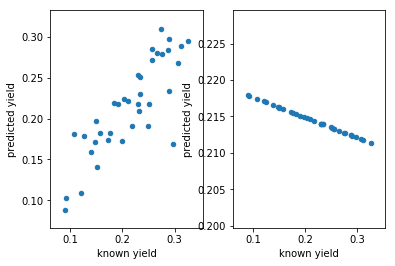

In [16]:
from mbpls.mbpls import MBPLS
from sklearn.model_selection import cross_val_predict
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=5)
prediction = cross_val_predict(pls,extractions_all,yield_all,cv=len(extractions_all))
prediction = pd.DataFrame(prediction)
yield_all = pd.DataFrame(np.array(yield_all))
prediction = pd.concat((prediction, yield_all),axis=1)
prediction.columns=['predicted yield', 'known yield']
fig, ax = plt.subplots(ncols=2)
prediction.plot.scatter(x='known yield', y='predicted yield',ax=ax[0])

mbpls = MBPLS(n_components=5, method='NIPALS')
prediction2 = cross_val_predict(mbpls,extractions_all,yield_all,cv=len(extractions_all))
prediction2 = pd.DataFrame(prediction2)
prediction2 = pd.concat((prediction2, yield_all),axis=1)
prediction2.columns=['predicted yield', 'known yield']
prediction2.plot.scatter(x='known yield', y='predicted yield',ax=ax[1])